# Titanic Survival Prediction

# Introduction

This dataset has been acquired from Kaggle: https://www.kaggle.com/competitions/titanic/data


The analysis of this dataset has two phases. The first phase includes the exploratory data analysis and data visualization to better understand the relationships and patterns within the dataset. In the second phase, i have used machine learning algorithms to predict the number of survived people from Titanic. At the end, i have checked my prediction by uploading it onto Kaggle where it avaluates how good my prediction was.


# Exploratory data analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

# evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
df = pd.read_csv('data/trainset_Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isna().sum()

177

In [4]:
df.shape

(891, 12)

In [5]:
counts = df['Survived'].value_counts()

(array([0, 1]), [Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')])

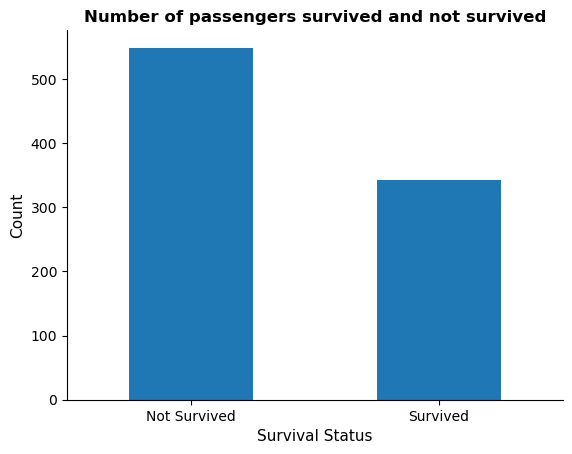

In [6]:
plot = counts.plot(kind = 'bar', xlabel = 'Survival status', ylabel = 'count')

plt.title("Number of passengers survived and not survived", weight = 'bold', fontsize =12)
plt.xlabel('Survival Status', fontsize = 11)
plt.ylabel('Count', fontsize = 11)

plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)


Survival_status_labels = ['Not Survived', 'Survived']  # Custom labels for the levels
plot.set_xticklabels(Survival_status_labels)

# Rotating the x-tick labels
plt.xticks(rotation=0) # rotation 0 is horizontal

In [173]:
#first class passengers
first_class = df[df['Pclass'] == 1]


first_class['Survived'].value_counts(normalize = True)

1    0.62963
0    0.37037
Name: Survived, dtype: float64

In [174]:

#the first class passengers who survived
survived_firstclass = first_class[first_class['Survived'] == 1]
survived_firstclass.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C


In [175]:
total_firstclass = df[df['Pclass'] == 1]['Pclass'].sum()
total_firstclass

216

In [176]:
#proportaion
proportion = len(survived_firstclass) / total_firstclass
proportion

0.6296296296296297

In [177]:
newdf = df[['Pclass', 'Sex']]
newdf

,Pclass,Sex
0,3,male
1,1,female
2,3,female
3,1,female
4,3,male
...,...,...
886,2,male
887,1,female
888,3,female
889,1,male


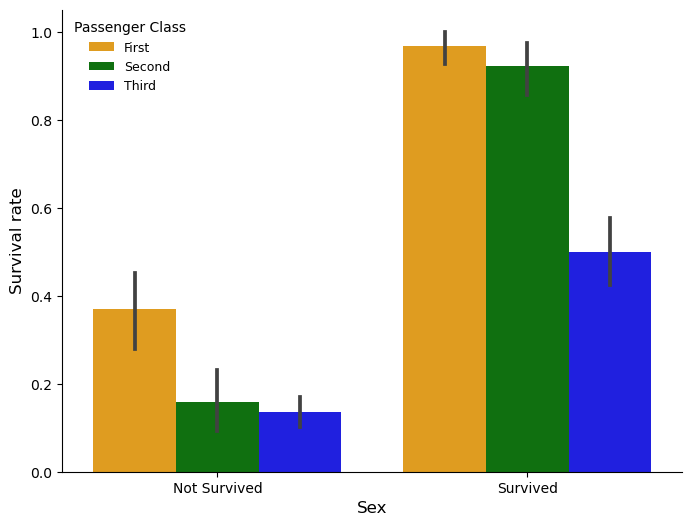

In [15]:
plt.figure(figsize=(8, 6)) 

custom_palette = ["orange", "green", "blue"]

plot = sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', palette = custom_palette,data = df)
plt.xlabel("Sex", size = 12)
plt.ylabel("Survival rate", size = 12)

plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)


Survival_status_labels = ['Not Survived', 'Survived']  # Custom labels for the levels
plot.set_xticklabels(Survival_status_labels)


legend = plt.legend(title='Passenger Class', loc='upper left', fontsize = 9)
legend.get_frame().set_linewidth(0)  # Remove legend frame border
legend.texts[0].set_text('First')  # Change legend label text
legend.texts[1].set_text('Second')  
legend.texts[2].set_text('Third')




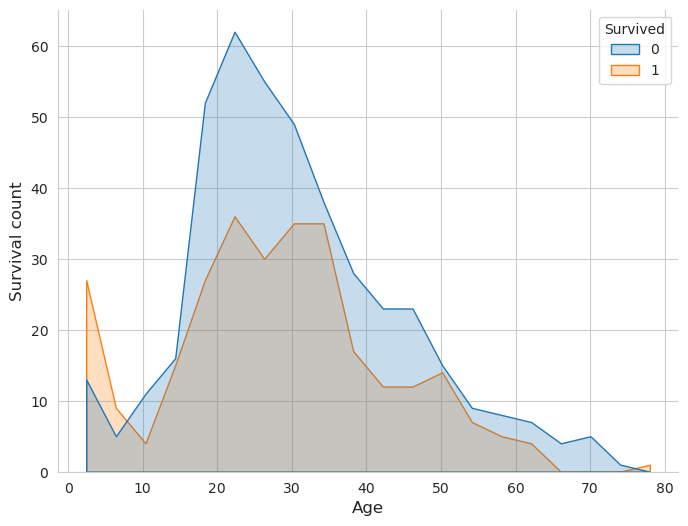

In [26]:
plt.figure(figsize=(8, 6)) 
plot = sns.histplot(x = 'Age' ,hue = 'Survived', data = df, element = 'poly')

plt.xlabel("Age", size = 12)
plt.ylabel("Survival count", size = 12)


plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)



In [27]:
survived = df[df['Survived'] == 1]

survived = survived['Age'].mean()

print('The average age of the survived passengers is:', survived)

The average age of the survived passengers is: 28.343689655172415


In [28]:
drowned = df[df['Survived'] == 0]
drowned = drowned['Age'].mean()

print('The average age of the dronwed passengers is:', drowned)

The average age of the dronwed passengers is: 30.62617924528302


In [29]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [30]:
mean_age = df['Age'].mean()
mean_age

29.69911764705882

In [31]:
# Replace missing age values by the mean age.
df['Age'] = df['Age'].fillna(mean_age)
df.head(20)
df.Age.isna().sum()

0

In [32]:
#Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

group_df = df.groupby(['Pclass', 'Sex'])

In [33]:
survived = group_df['Survived'].agg(['sum', 'count']).rename(columns = {'sum': 'Survived', 'count': 'Total'})

In [34]:
survived['Drowned'] = survived['Total'] - survived['Survived']
survived

Survived  Total  Drowned
Pclass Sex                             
1      female        91     94        3
       male          45    122       77
2      female        70     76        6
       male          17    108       91
3      female        72    144       72
       male          47    347      300

In [35]:
print(survived.columns)

Index(['Survived', 'Total', 'Drowned'], dtype='object')


In [36]:
survived = survived.reset_index()
survived

,Pclass,Sex,Survived,Total,Drowned
0,1,female,91,94,3
1,1,male,45,122,77
2,2,female,70,76,6
3,2,male,17,108,91
4,3,female,72,144,72
5,3,male,47,347,300


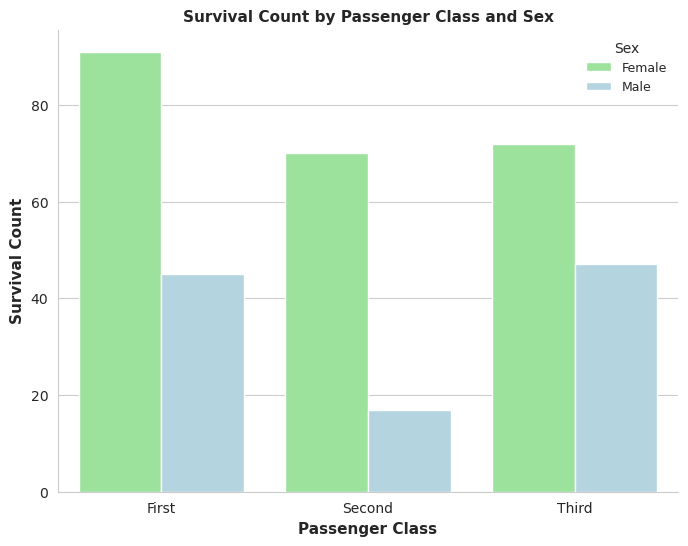

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 6))

custom_palette = ['lightgreen', 'lightblue']

plot= sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', palette = custom_palette, data = survived)

plt.xlabel("Passenger Class", weight = 'bold', size= 11)
plt.ylabel("Survival Count",  weight = 'bold', size= 11)
plt.title("Survival Count by Passenger Class and Sex",  weight = 'bold', size= 11)


plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)


Survival_status_labels = ['First', 'Second', 'Third']  # Custom labels for the levels
plot.set_xticklabels(Survival_status_labels)


legend = plt.legend(title='Sex', loc='upper right', fontsize = 9)
legend.get_frame().set_linewidth(0)  # Remove legend frame border
legend.texts[0].set_text('Female')  # Change legend label text
legend.texts[1].set_text('Male')  

# Machine learning algorithms

In [191]:
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [192]:
# check the missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [193]:
mean_age = df['Age'].mean()
mean_age

29.69911764705882

In [194]:
df['Age'] = df['Age'].fillna(mean_age)
df.head(20)
df.Age.isna().sum()

0

In [195]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [196]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

## Test-train-Split

In [197]:
x = df[['Pclass', 'Sex', 'Age']]
y = df['Survived']

In [198]:
x.head()

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


In [199]:
x_train, x_val, y_train, y_val = train_test_split(x,y, random_state=42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape
#x_train
#x_train.isna().sum().sum()

((668, 3), (223, 3), (668,), (223,))

In [200]:
#df['Sex'] = pd.to_numeric(df['Sex'], errors = 'coerce')

#print(df['Sex'].dtype)

In [201]:
#df['Age'].unique()
#df['Age'] = pd.to_numeric(df['Age'], errors = 'coerce')

print(df['Age'].dtype)


float64


In [202]:
column_transform = ColumnTransformer(
    [("encoder", OneHotEncoder(handle_unknown = "ignore", sparse = False, drop = 'first'), ['Sex']),
     ("binner" , KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile'), ['Age'])
    ],
    remainder = 'passthrough'
)

In [203]:
x_train_transform = column_transform.fit_transform(x_train)
x_train_transform

C:\Users\k\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,encoder__Sex_male,binner__Age_0.0,binner__Age_1.0,binner__Age_2.0,binner__Age_3.0,remainder__Pclass
298,1.0,0.0,0.0,1.0,0.0,1
884,1.0,0.0,1.0,0.0,0.0,3
247,0.0,0.0,1.0,0.0,0.0,2
478,1.0,0.0,1.0,0.0,0.0,3
305,1.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...
106,0.0,1.0,0.0,0.0,0.0,3
270,1.0,0.0,0.0,1.0,0.0,1
860,1.0,0.0,0.0,0.0,1.0,3
435,0.0,1.0,0.0,0.0,0.0,1


In [204]:
# run the column transformation for the validation data set too so that they both have the similar and updated columns
x_val_transform = column_transform.transform(x_val)
x_val_transform

,encoder__Sex_male,binner__Age_0.0,binner__Age_1.0,binner__Age_2.0,binner__Age_3.0,remainder__Pclass
709,1.0,0.0,0.0,1.0,0.0,3
439,1.0,0.0,0.0,1.0,0.0,2
840,1.0,1.0,0.0,0.0,0.0,3
720,0.0,1.0,0.0,0.0,0.0,2
39,0.0,1.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...
880,0.0,0.0,1.0,0.0,0.0,2
425,1.0,0.0,0.0,1.0,0.0,3
101,1.0,0.0,0.0,1.0,0.0,3
199,0.0,0.0,1.0,0.0,0.0,2


## Logistic Regression

In [205]:
logreg = LogisticRegression()
logreg.fit(x_train_transform, y_train)

LogisticRegression()

In [206]:
logreg.score(x_train_transform, y_train)

0.7949101796407185

In [207]:
logreg.score(x_val_transform, y_val)

0.7982062780269058

## Decision Trees

### Run Training Model

In [234]:
clf_DT = DecisionTreeClassifier(max_depth = 4, random_state = 42) # ccp_alpha = 0.01  - tree pruning

In [235]:
clf_DT.fit(x_train_transform, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

### Make predictions

In [236]:
clf_DT_predict = clf_DT.predict(x_val_transform)
clf_DT_predict

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [237]:
# compare our predictions with the actual info and see whether they are good or not!

accuracy_score(y_val, clf_DT_predict)

0.7802690582959642

In [238]:
confusion_matrix(y_val, clf_DT_predict)

array([[118,  16],
       [ 33,  56]], dtype=int64)

In [239]:
##ConfusionMatrixDisplay.from_predictions

In [240]:
precision_score(y_val, clf_DT_predict)

0.7777777777777778

In [241]:
recall_score(y_val, clf_DT_predict)

0.6292134831460674

In [242]:
print(classification_report(y_val, clf_DT_predict, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.78      0.88      0.83       134
    Survived       0.78      0.63      0.70        89

    accuracy                           0.78       223
   macro avg       0.78      0.75      0.76       223
weighted avg       0.78      0.78      0.78       223



In [243]:
# check which features are more important the others
feature_names = x_train_transform.columns
feature_names

Index(['encoder__Sex_male', 'binner__Age_0.0', 'binner__Age_1.0',
       'binner__Age_2.0', 'binner__Age_3.0', 'remainder__Pclass'],
      dtype='object')

- Note about **feature importances**: The importance score represents the relative contribution of a feature to the model's ability to make accurate predictions. Higher values indicate greater importance, while lower values indicate lesser importance. 
    The sum of all feature importances is usually equal to 1.

In [244]:
# the list correspond to the features

clf_DT.feature_importances_

array([0.6941472 , 0.02476595, 0.00807825, 0.00403313, 0.01876401,
       0.25021146])

In [245]:
feature_imporatance = pd.DataFrame(clf_DT.feature_importances_, index = feature_names).sort_values(by = 0, ascending=False)
feature_imporatance

,0
encoder__Sex_male,0.694147
remainder__Pclass,0.250211
binner__Age_0.0,0.024766
binner__Age_3.0,0.018764
binner__Age_1.0,0.008078
binner__Age_2.0,0.004033


<Axes: >

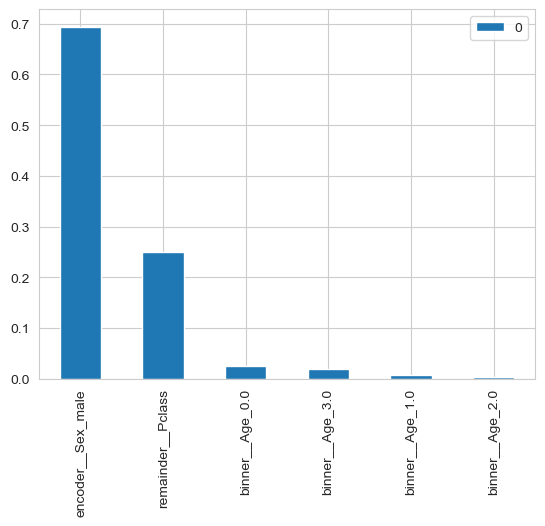

In [246]:
# plot of the feature importances
feature_imporatance.plot(kind = 'bar')


### Plotting the Decision Trees

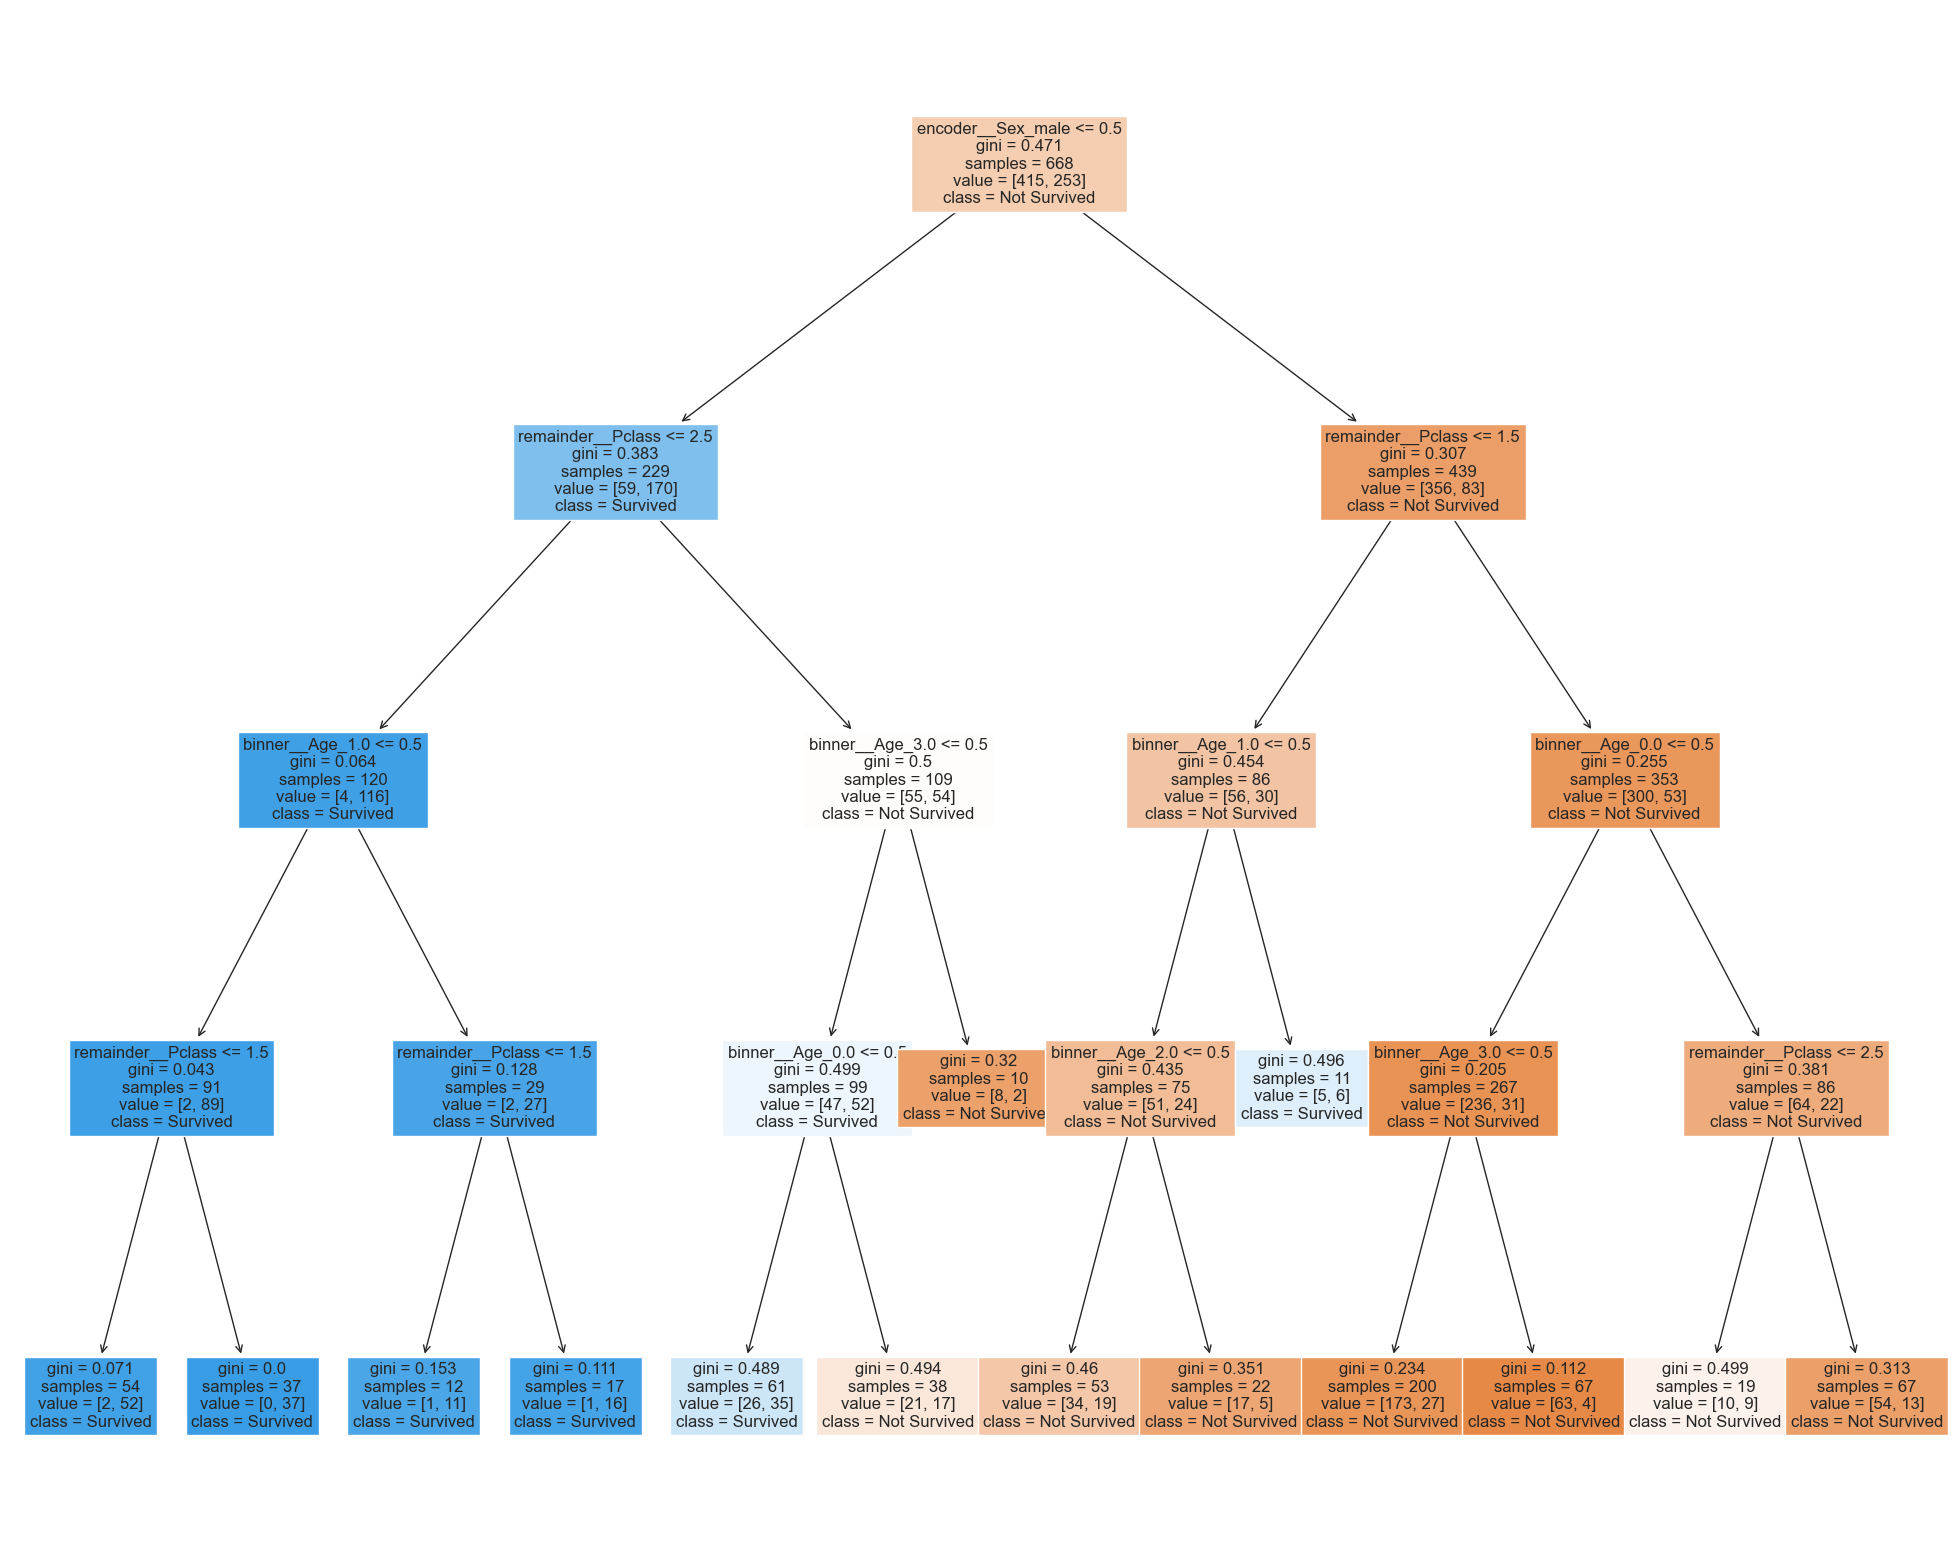

In [261]:
# plotting the actual tree of the model decides
from sklearn import tree

fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(clf_DT, 
                   feature_names=feature_names,  #refers to columns
                   class_names={0:'Not Survived', 1:'Survived'},
                   filled=True,
                  fontsize=12)

## Random Forest

In [248]:
clf_RF = RandomForestClassifier(n_estimators = 10, max_depth = 2)

clf_RF.fit(x_train_transform, y_train)

RandomForestClassifier(max_depth=2, n_estimators=10)

In [249]:
clf_RF_preds = pd.DataFrame(clf_RF.predict(x_val_transform))

In [250]:
accuracy_score(y_true = y_val, y_pred = clf_RF_preds)


0.7937219730941704

## Evaluating of the prediction on Kaggle

### Based on logistic Regression model

In [251]:
test_df = pd.read_csv('data/test.csv')
test_df.head()
test_df.shape

(418, 11)

In [252]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [253]:
meanAge = test_df['Age'].mean()
meanAge

30.272590361445783

In [254]:
test_df['Age'] = test_df['Age'].fillna(meanAge)
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [255]:
x = test_df[['Pclass', 'Sex', 'Age']]
x.head()

,Pclass,Sex,Age
0,3,male,34.5
1,3,female,47.0
2,2,male,62.0
3,3,male,27.0
4,3,female,22.0


In [256]:
column_transformation = ColumnTransformer(
    [("encoder", OneHotEncoder(handle_unknown = "ignore", sparse = False, drop = 'first'), ['Sex']),
     ("binner" , KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile'), ['Age'])
    ],
    remainder = 'passthrough'
)

In [257]:
x_columntransformation = column_transformation.fit_transform(x)
x_columntransformation.head()

C:\Users\k\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,encoder__Sex_male,binner__Age_0.0,binner__Age_1.0,binner__Age_2.0,binner__Age_3.0,remainder__Pclass
0,1.0,0.0,0.0,1.0,0.0,3
1,0.0,0.0,0.0,0.0,1.0,3
2,1.0,0.0,0.0,0.0,1.0,2
3,1.0,0.0,1.0,0.0,0.0,3
4,0.0,1.0,0.0,0.0,0.0,3


In [258]:
predict = logreg.predict(x_columntransformation)
predict.shape

(418,)

In [259]:
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predict})
submission.to_csv('submission.csv', index=False)